<a href="https://colab.research.google.com/github/JMCastle98/M4_Analisis_de_Datos_con_Python/blob/main/Postwork08/Postwork08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postwork 8 - K-Means

Como último punto a analizar, realizamos un algorítmo de Machine Learning para determinar si nuestros datos logran ajustarse al comportamiento de otra variable. 

Recordemos que el método de K-Means es un método de agrupamiento, donde a partir del número de particiones o núcleos que les damos, realiza un reagrupamiento de nuestros datos a partir de los núcleos.

Como tal en nuestros datos ya tenemos etiquetas, K-Means, es un método de aprendizaje no supervisado, por lo que no requiere de las etiquetas para realizar el reagrupamiento. Dado esto primero observaremos los datos con etiquetas y luego las retiraremos y realizaremos el algorítmo para saber si este se ajusta o no. 

Primero llamamos a nuestro dataframe df_clean, el cual realizamos en los postwork anteriores

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_clean = pd.read_csv("https://raw.githubusercontent.com/JMCastle98/M4_Analisis_de_Datos_con_Python/main/Dataset/pok%C3%A9dex_clean.csv", index_col=0)

In [9]:
df_clean.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45.0,Medium Slow
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45.0,Medium Slow
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45.0,Medium Slow
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,625,80,100,123,122,120,80,45.0,Medium Slow
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,309,39,52,43,60,50,65,45.0,Medium Slow


Generamos en listas las etiquetas, en este caso, etiquetaremos los datos a partir de su status, si el pokémon es:

    'Normal'
    'Sub Legendary'
    'Legendary'
    'Mythical'

También realizaremos etiquetas para los marcadores de estos pokémon y sus respectivos colores 

In [10]:
status = list (df_clean['status'].unique() )
marcador = ["o","p","h","D"]
colores = ["blue","red","green","yellow"]

Luego agregaremos datos categóricos discretos a cada status y lo guardaremos en una lista, que posteriormente agregaremos en nuestro dataframe:


In [11]:

especie = []
for i in range(0,len(df_clean)):
  if df_clean["status"][i] == "Normal":
    especie.append(0)
  elif df_clean["status"][i] == "Sub Legendary":
    especie.append(1)
  elif df_clean["status"][i] == "Legendary":
    especie.append(2)
  else:
    especie.append(3)
df_kmeans = df_clean
df_kmeans["especies_num"] = especie

Graficamos cada dato con sus respectivas etiquetas a partir de un ciclo for que corra sobre los 4 valores que contiene la lista que acabamos de crear. 

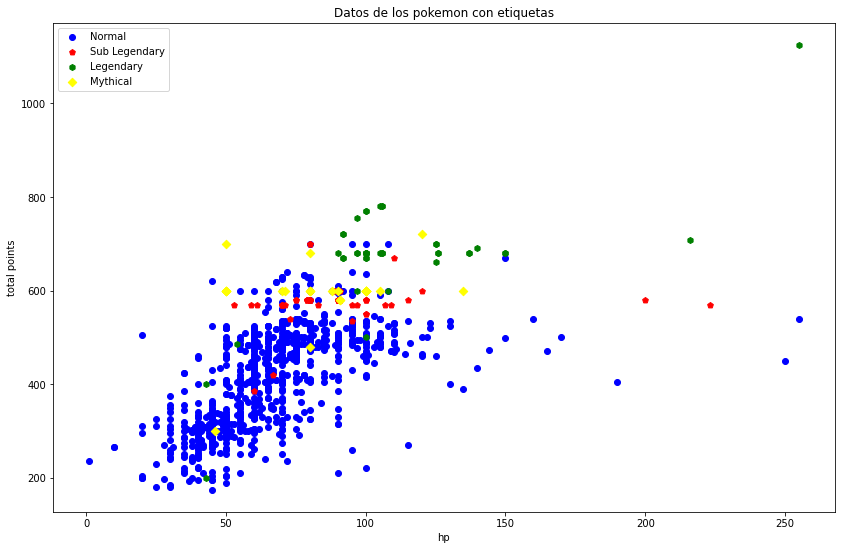

In [12]:

plt.figure(figsize=(14,9))

for i in range(0, 4):    
    df_kmeans_iteration = df_kmeans[df_kmeans['especies_num'] == i]    
    plt.scatter(df_kmeans_iteration.hp, df_kmeans_iteration.total_points, 
                color=colores[i], label=status[i], marker=marcador[i])

plt.xlabel('hp')
plt.ylabel('total points')
plt.title('Datos de los pokemon con etiquetas')
plt.legend()
plt.show()

Observamos que la mayor parte de pokémon son de estatus normal y estos tienen una relación de estadísticas y vida bajas, los pokémon más raros suelen los más fuertes y tienen la mayor cantidad de puntos y vida.

Antes de empezar el método de k-means, condicionamos los datos para ingresarlos a nuestro algoritmo, realizamos un método de codo para saber el número de clusters óptimos. Cabe resaltar que este método sólo considera las variables de entrada, en este caso dos:

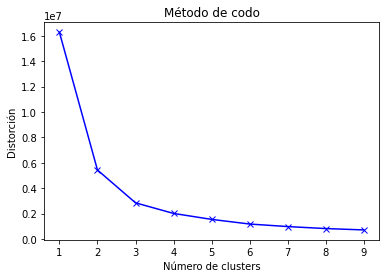

In [13]:
X = list(df_kmeans['hp'])
Y = list(df_kmeans['total_points'])

lista_datos = [list(x) for x in zip(X,Y)]

datos = np.array(lista_datos)

###################################################

from sklearn.cluster import KMeans

distorcion=[]
K=range(1,10)

for k in K:
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(datos)
    distorcion.append(kmeans.inertia_)
    
plt.plot(K,distorcion, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Distorción')
plt.title('Método de codo')
plt.show()

El método de codos nos da información de los clusters necesarios para tener un error menor. Realizamos nuestro método de k-means para saber como clasificó nuestros datos y si concuerda con los datos etiquetados de la parte superior.

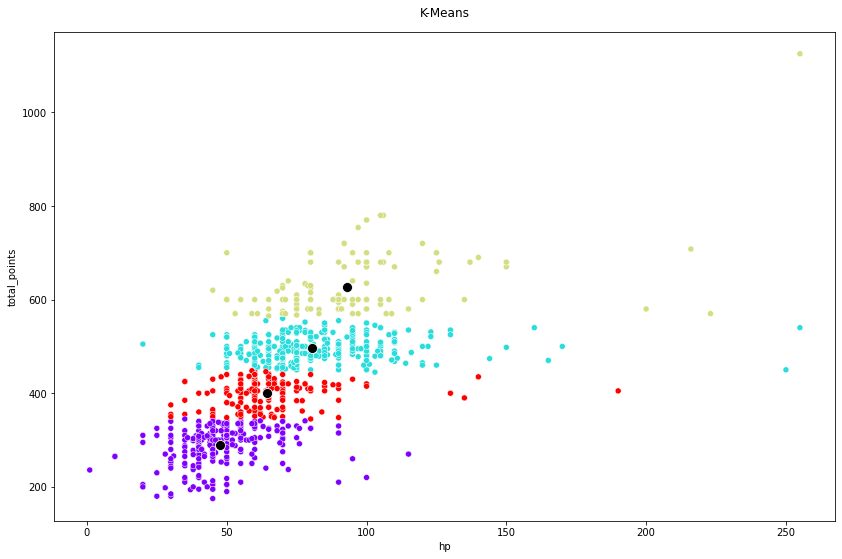

In [14]:
k_means_4 = KMeans(n_clusters=4, max_iter=100000)
k_means_4.fit(df_kmeans[['hp', 'total_points']])
centers_4 = k_means_4.cluster_centers_
clasificaciones_4 = k_means_4.predict(df_kmeans[['hp', 'total_points']])



fig = plt.figure(figsize=(14,9))

ax = fig.add_subplot()

ax.set_title('K-Means', pad=15)
ax.set_xlabel('hp')
ax.set_ylabel('total_points')

sns.scatterplot(x = df_kmeans['hp'], y = df_kmeans['total_points'], 
                ax=ax, hue=clasificaciones_4, palette='rainbow');

sns.scatterplot(x= centers_4[:,0], y = centers_4[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()


Notamos el agrupamiento de nuestros datos, estos se realizaron en 4 grupos como, observando ambos casos, con etiquetas y sin etiquetas notamos una similitud significativa entre nuestros datos, por lo que el método de K-Means actuó de manera correcta en al asignar el status en base a las estadísticas.

# Conclusiones

Durante el desarrollo de este proyecto, pudimos explorar los datos que describen a las criaturas del mundo pokémon, en un principio analizamos sus estadísticas y como estas se distribuían para identificar las características de un pokémon promedio en los más fuertes.

Después hicimos agrupaciones categóricas para saber que tipos de pokémon eran más comúnes, en que generación se incluyeron más o que tan diferentes son las estadísticas de los pokémon conforme a sus status.

Posteriormente analizamos las relaciones entre las diferentes variables, observamos que las estadísticas de combate son las de mejor relación (confirmando estas suposiciones con Binnings Hexagonales) y estás variables siempre tenderán a ciertos valores como aprendimos al utilizar el método boostrap.

Con ayuda de los treempas pudimos observar las combinaciones de tipos más comúnes que tienen los pokémon al observar el tipo primario y el tipo secundario. Y con las técnicas de procesamiento del lenguaje natural analizamos las especies de pokémon y los nombres más comúnes.

Finalmente utilizando el método de k-means encontramos un modelo para identificar el estatus de un pokémon en base a sus estadísticas de puntos totales y vida.

<p align="center">
<img src="https://pm1.narvii.com/6896/dcef1f1ec84c2c67cf2794a5e0b22fec4054dcb1r1-443-332v2_hq.jpg"  height ="250" width = "400">
</p>

Realizar todos los postwork fue una tarea muy divertida gracias al tema que elegimos y además pudimos aplicar todo lo que vimos en el curso resultando así en una experiencia muy enriquecedora, agradecimos al equipo BEDU y al experto por brindarnos estás herramientas de análisis que pueden explotar desde temas complejos hasta hobbies y aficiones como el mundo pokémon.